**Разбор способа отбора модлеи - L2-регуляризация**

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder

from IPython.display import clear_output

# Источники

- https://www.statlearning.com/ 6 глава.

# Описание

При L2-регуляризации в целевую функцию метода оценки коэффициентов добавляют компоненнту:

$$\lambda\sum_{j=1}^n\beta^2_j$$

Где:
- $\beta_j$ - оцениваемый коэффициент;
- $\lambda$ - параметр указывающий на сколько сильно следует регуляризовать модель.


L2-регуляризация и регуляризация, в принципе, нужна для того, чтобы модель получала штраф за использование коэффициентов, которые ей на самом деле не нужны.

# Гребеньковая регрессия

## *Описание*

L2-регулялизация в сочетании с регрессионной моделью, называются **гребеньковой регрессией (ridge regression)**. Т.е. целевая функция в задаче оптимизации принимает вид:

$$\sum_{i=1}^n\left(y_i - x_i\beta\right)^2 + \lambda\sum_{j=1}^p\beta_j \rightarrow min$$

Где:
- $n$ - объемы выборки;
- $p$ - размерность данных;
- $x_i = (x_{i1}, x_{i2}, ..., x_{ip})$ - вектор описывающий $i$-е наблюдение;
- $\beta = (\beta_1, \beta_2, ..., \beta_p)$ - вектор оценок коэффициентов.

## *Рекомендуется стандартизация данных*

Перед применением Гребеньковой регрессии данные рекомендуется стандартизовать по формуле.


$$\tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n (x_{ij} - \bar{x}_{j})^2}}.$$

Где:
- $\bar{x}_{j}$ - среднее значенте по $j$-му показателю.

Подробнее о стандартизации можно узнать <a href="https://github.com/Dranikf/knowledge_bank/blob/main/machine_learning/data_transformations/standartisation.ipynb">тут</a>.

# Пример на данных `Credit`

Воссоздается пример приведенный в <a href="https://www.statlearning.com/">ISLR</a>.

Загрузка данных `Credit`

In [2]:
Credit = pd.read_csv("Credit.csv", index_col = 0)

nominal_names = [
    "Gender", "Student", "Married", "Ethnicity"
]

ohe = OneHotEncoder(
    sparse = False, drop = "first"
).fit(
    Credit[nominal_names]
)

Credit = pd.concat(
    [
        pd.DataFrame(
            ohe.transform(Credit[nominal_names]),
            columns = ohe.get_feature_names_out(),
            index= Credit.index
        ),
        Credit.loc[:,~Credit.columns.isin(nominal_names)]
    ],
    axis = 1
)

X = Credit.iloc[:,:-1]
y = Credit.iloc[:, -1]

Credit.head()

,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Income,Limit,Rating,Cards,Age,Education,Balance
ID,,,,,,,,,,,,
1,0.0,0.0,1.0,0.0,1.0,14.891,3606,283,2,34,11,333
2,1.0,1.0,1.0,1.0,0.0,106.025,6645,483,3,82,15,903
3,0.0,0.0,0.0,1.0,0.0,104.593,7075,514,4,71,11,580
4,1.0,0.0,0.0,1.0,0.0,148.924,9504,681,3,36,11,964
5,0.0,0.0,1.0,0.0,1.0,55.882,4897,357,2,68,16,331


Будем повышать параметр регуляризации и забирать значения коэффициентов. Процедура достаточно долгая, потому предполагается провести расчет и результаты отложить в файл.

In [14]:
coefs_frame = pd.read_csv("l2_reg_coefs.csv", index_col = 0)
coefs_frame

,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Income,Limit,Rating,Cards,Age,Education
alpha,,,,,,,,,,,
0.00,-5.323360,127.724208,-4.157540,7.324290,5.053449,-274.670668,440.099553,175.628144,24.274738,-10.576563,-3.429855
0.01,-5.322498,127.710472,-4.169144,7.331194,5.054263,-274.638311,438.554003,177.143581,24.209965,-10.580483,-3.421506
0.02,-5.321629,127.696955,-4.180491,7.337921,5.055055,-274.605876,437.043453,178.623887,24.146708,-10.584372,-3.413337
0.03,-5.320753,127.683651,-4.191589,7.344476,5.055826,-274.573366,435.566712,180.070258,24.084915,-10.588233,-3.405341
0.04,-5.319872,127.670552,-4.202447,7.350866,5.056576,-274.540784,434.122646,181.483832,24.024537,-10.592065,-3.397513
...,...,...,...,...,...,...,...,...,...,...,...
1999.95,1.362215,19.822597,-0.934690,-0.268420,-0.002692,21.198699,54.176957,54.289475,6.212049,-2.284239,-0.207631
1999.96,1.362210,19.822514,-0.934684,-0.268421,-0.002693,21.198660,54.176768,54.289285,6.212024,-2.284222,-0.207631
1999.97,1.362205,19.822432,-0.934679,-0.268421,-0.002694,21.198622,54.176578,54.289095,6.212000,-2.284205,-0.207631


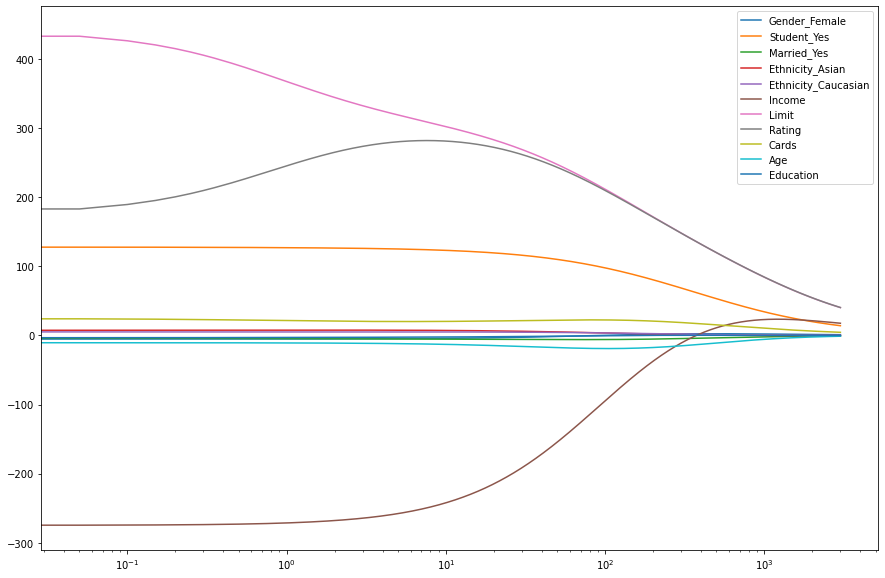

In [7]:
plt.figure(figsize = [15, 10])
coefs_frame.plot(ax = plt.gca())
plt.gca().set_xscale('log')